# City of Philadelphia Licenses and Inspections Appeals

The dataset contains decisions of Philadelphia Licenses and Inspections Appeal Board. The dataset contains 28869 records and 37 columns.

Several columns such as Appeal Grounds, Related Permits and Proviso are in Natural Language format. 

Source: https://www.opendataphilly.org/dataset/license-and-inspections-appeals/resource/b721ad52-9e27-46d2-b494-6bf0ef1c7603?inner_span=True

### I would like to research the relationship of the board decision stored in the column 'decision' and other values in the dataset such as Appeal Grounds(NL), Related Permits(NL), Proviso(NL) and well as property address(geospatial).


### Loading necessary packages

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics #metrics module

hypertable=[]

### Load and review the data

In [2]:
#Database URL
url = 'https://phl.carto.com/api/v2/sql?q=SELECT+*,+ST_Y(the_geom)+AS+lat,+ST_X(the_geom)+AS+lng+FROM+appeals&filename=appeals&format=csv&skipfields=cartodb_id'
#Initial Dataset load
df = pd.read_csv(url, low_memory=False)

In [3]:
#Sample data
df.head()

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,scheduleddate,decision,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng
0,0101000020E610000037BAFB2B1DC352C03A158AB3C90A...,0101000020110F000083B7668792DE5FC1D7531E50DD9B...,8,716319.0,8940 KREWSTOWN RD,NaN,118,19115-4517,888630077.0,646106,...,2010-05-04 13:15:00,MOOT,NaN,COMPLIED,2010-05-04 00:00:00,HANSEN,2.724252e+06,285119.162422,40.084280,-75.048656
1,0101000020E61000003690253716C852C06DEBA50163FD...,0101000020110F00008ED1ECEB04E75FC16710A3FAFF8C...,9,628798.0,2300 E YORK ST,NaN,NaN,19125-2120,313145500.0,363094,...,2009-10-28 17:00:00,GRANTED,NaN,NaN,2009-10-28 00:00:00,HANSEN,2.703654e+06,246341.440497,39.979584,-75.126356
2,0101000020E61000003C08EF26A0CB52C03BDF48F08D06...,0101000020110F0000E86105BF07ED5FC1EBBBD9912A97...,10,531963.0,128 E SHARPNACK ST,NaN,NaN,19119-2237,221108000.0,313082,...,2009-12-29 13:15:00,MOOT,NaN,COMPLIED,2009-12-30 00:00:00,HANSEN,2.687406e+06,271965.871360,40.051207,-75.181650
3,0101000020E61000000E3A31E95AC552C0FDEF06071902...,0101000020110F000085E81E1561E25FC16F05D2083992...,11,297984.0,4671 FRANKFORD AVE,NaN,NaN,19124-5827,871529760.0,565329,...,2009-10-06 09:30:00,GRANTED,NaN,NaN,2009-10-06 00:00:00,HANSEN,2.715205e+06,260100.891162,40.016389,-75.083674
4,0101000020E6100000926D2397A0CE52C05ED5D7D893FB...,0101000020110F0000A996150421F25FC15C0150B0FE8A...,12,589254.0,5421 VINE ST,NaN,NaN,19139-2041,41034400.0,511115,...,2009-12-29 13:15:00,WITHDRAWN,NaN,NaN,2009-10-21 00:00:00,HANSEN,2.675173e+06,240360.419544,39.965449,-75.228552


In [4]:
#Number of rows and features
print("df.shape", df.shape)

df.shape (29562, 37)


In [5]:
#Column Names
df.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid',
       'address', 'unit_type', 'unit_num', 'zip', 'opa_account_num',
       'parcel_id_num', 'censustract', 'opa_owner', 'primaryappellant',
       'appellanttype', 'internaljobid', 'appealnumber', 'acceleratedappeal',
       'createddate', 'completeddate', 'relatedpermit', 'relatedcasefile',
       'appealstatus', 'appealtype', 'agendadescription', 'applicationtype',
       'meetingnumber', 'appealgrounds', 'scheduleddate', 'decision',
       'meetingresult', 'proviso', 'decisiondate', 'systemofrecord',
       'geocode_x', 'geocode_y', 'lat', 'lng'],
      dtype='object')

In [6]:
#General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29562 entries, 0 to 29561
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              28953 non-null  object 
 1   the_geom_webmercator  28953 non-null  object 
 2   objectid              29562 non-null  int64  
 3   addressobjectid       28992 non-null  float64
 4   address               28981 non-null  object 
 5   unit_type             98 non-null     object 
 6   unit_num              551 non-null    object 
 7   zip                   28981 non-null  object 
 8   opa_account_num       27732 non-null  float64
 9   parcel_id_num         28311 non-null  object 
 10  censustract           28953 non-null  float64
 11  opa_owner             28406 non-null  object 
 12  primaryappellant      29562 non-null  object 
 13  appellanttype         29020 non-null  object 
 14  internaljobid         27715 non-null  float64
 15  appealnumber       

&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;

***
### Clear out Null values

I am dropping records with Null value in Decision column. They represent less than 10% of the data. With the multitude of unique values in that column I can't decide what value I can replace it with.

In [7]:
df = df[~df['decision'].isna()]
df[df['systemofrecord'].isna()]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,scheduleddate,decision,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng


In [8]:
#df.nunique()/df.shape[0]
df[df['decision'].isna()].shape[0]/df.shape[0]

0.0

In [9]:
df[df['lat'].isna()].shape[0]

17

I'm dropping these as well.

In [10]:
df = df[~df['lat'].isna()]

&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;

### Clean Zip column

In [11]:
pd.concat([df['zip'].astype('str').str.slice(0,5), df['zip'].astype('str').str.slice(6,10)],axis = 1)

,zip,zip
0,19115,4517
1,19125,2120
2,19119,2237
3,19124,5827
4,19139,2041
...,...,...
29557,19141,3330
29558,19115,3703
29559,19130,2206
29560,19130,1504


In [12]:
#(df['zip'].astype('str').str.slice(0,5) + df['zip'].astype('str').str.slice(6,10)).astype('int')
#df['zip'].astype('str').str.slice(0,5).astype('int')

In [13]:
#Percent of unique values per values per column
df.nunique()/df.shape[0]

the_geom                0.802232
the_geom_webmercator    0.802232
objectid                1.000000
addressobjectid         0.814063
address                 0.805218
unit_type               0.000149
unit_num                0.004329
zip                     0.487236
opa_account_num         0.775174
parcel_id_num           0.772374
censustract             0.014257
opa_owner               0.706427
primaryappellant        0.458088
appellanttype           0.000224
internaljobid           0.984959
appealnumber            1.000000
acceleratedappeal       0.000075
createddate             0.998582
completeddate           0.450437
relatedpermit           0.982309
relatedcasefile         0.000037
appealstatus            0.000299
appealtype              0.000224
agendadescription       0.000037
applicationtype         0.000187
meetingnumber           0.015041
appealgrounds           0.922968
scheduleddate           0.174741
decision                0.001120
meetingresult           0.000261
proviso   

In [14]:
df.dtypes

the_geom                 object
the_geom_webmercator     object
objectid                  int64
addressobjectid         float64
address                  object
unit_type                object
unit_num                 object
zip                      object
opa_account_num         float64
parcel_id_num            object
censustract             float64
opa_owner                object
primaryappellant         object
appellanttype            object
internaljobid           float64
appealnumber             object
acceleratedappeal        object
createddate              object
completeddate            object
relatedpermit            object
relatedcasefile          object
appealstatus             object
appealtype               object
agendadescription        object
applicationtype          object
meetingnumber            object
appealgrounds            object
scheduleddate            object
decision                 object
meetingresult            object
proviso                  object
decision

In [15]:
df['createddate'] = pd.to_datetime(df['createddate'])

In [16]:
df['completeddate'] = pd.to_datetime(df['completeddate'])
df['scheduleddate'] = pd.to_datetime(df['scheduleddate'])
df['decisiondate'] = pd.to_datetime(df['decisiondate'])

In [17]:
#Top examples of "appealgrounds"
df['appealgrounds'].value_counts().head(10)

PERMIT FOR TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                       110
PERMIT FOR A TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                      65
WE ARE APPEALING THE ISSUANCE OF BUILDING PERMIT #765070 FOR HEALTH AND ENVIRONMENTAL CONCERNS.     63
PERMIT FOR THREE (3) FAMILY DWELLING (MULTI-FAMILY DWELLING) IN AN EXISTING STRUCTURE.              56
PERMIT FOR A TWO(2) FAMILY DWELLING.                                                                55
PERMIT FOR A THREE(3) FAMILY DWELLING.                                                              51
PERMIT FOR A TWO(2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                       37
PERMIT FOR A TWO (2) FAMILY DWELLING.                                                               36
PERMIT FOR A TWO FAMILY DWELLING.                                                                   35
PERMIT FOR TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE              

In [18]:
#Top examples of "relatedpermit"
df['relatedpermit'].value_counts().head(10)

Description of Project:  SM/LRG FOOD ESTAB\n  APPEAL TYPES==> \nAPPEAL TYPE: LI-REFGRNT  \n\n  BOARD DECISIONS==> \nDECISION: CONTINUED  DECDATE: 16-OCT-18  PROVISO:   \n\n  COURT APPEALS==> \n                                                                                                                                                                                                  29
Description of Project:  BUILDING PERMIT #765070\n  APPEAL TYPES==> \nAPPEAL TYPE: AGAINSTL&I  \n\n  BOARD DECISIONS==> \nDECISION: AFFIRMED  DECDATE: 28-JUL-17  PROVISO:   \n\n  COURT APPEALS==> \n                                                                                                                                                                                             28
Description of Project:  PWD\n  APPEAL TYPES==> \nAPPEAL TYPE: WATER  \n\n  BOARD DECISIONS==> \n\n  COURT APPEALS==> \n                                                                                                    

In [19]:
#Top value of "proviso"
df['proviso'].value_counts().head(10)

COMPLIED                                                          1751
FOR WANT OF APPEARANCE                                             737
*****CASE WITHDRAWN.*****                                          402
*****CASE DISMISSED.*****                                          163
*****CASE DISMISSED - PUT INTO ENFORCEMENT.*****                   109
60 DAY STAY OF ENFORCEMENT                                         101
90 DAY STAY OF ENFORCEMENT                                          85
30 DAY STAY OF ENFORCEMENT                                          58
WITHOUT PREJUDICE;  CITY HAS THE RIGHT TO RE-ISSUE VIOLATIONS.      54
120 DAY STAY OF ENFORCEMENT                                         53
Name: proviso, dtype: int64

In [20]:
#Breakdown by decision
df['decision'].value_counts()

GRANTED                  8436
GRANTED/PROV             6260
WITHDRAWN                2420
MOOT                     2283
AFFIRMED                 1956
DENIED                   1796
APPROVED                 1554
DISMISSED                 936
Complete                  355
SUSTAINED                 255
CONTINUED                 224
DENIED/PROV                69
ADMIN/REVIEW               63
DISMI/ENFORC               42
REMAND                     38
Dismissed / Withdrawn      38
HELD                       17
NEWHEARNOT                 12
HELD/INFO                   9
BOARDAKNOWL                 7
Continued                   6
Cancelled                   3
LATE-APPRVD                 3
REFUSED                     3
LATE-DENIED                 2
NEWHEARYES                  2
REVISED                     2
RESCHEDULE                  1
ISSUED                      1
Rescheduled                 1
Name: decision, dtype: int64

In [21]:
# Save the values
df['decisionsv']=df['decision']

In [22]:
df[(df['decision'].str.contains('/PROV') == True) & (df['proviso'].isna() == True)][['decision', 'proviso']]

,decision,proviso
3586,DENIED/PROV,NaN
25686,GRANTED/PROV,NaN


Even though there are only two records, it appears that /PROV in the 'decision' field doesn't mean that there is value in the field 'proviso'

In [23]:
df[~(df['decision'].str.contains('/PROV') == True) & (df['proviso'].isna() == False)][['decision', 'proviso']]

,decision,proviso
0,MOOT,COMPLIED
2,MOOT,COMPLIED
9,AFFIRMED,CITY WILL STAY ENFORCEMENT FOR 60 DAYS TO SECU...
21,AFFIRMED,CITY WILL STAY ENFORCEMENT ACTION FOR 90 DAYS.
22,MOOT,COMPLIED
...,...,...
29489,Complete,Provisos:\r\n1. Enclose and screen trash area....
29538,Complete,"Proviso: Revised plans, 1 page, approved today."
29541,AFFIRMED,60 DAYS STAY OF ENFORCEMENT
29542,MOOT,COMPLIED


not having /PROV in 'decision' field doesn't mean no value in 'provision'

### Remove /PROV value from decision column and store it as a flag in a separate field

In [24]:
# Add new field prvFlag to store "/PROV" from decision
df['provFlag'] = (df['decision'].str.contains('/PROV') == True).astype('int')

In [25]:
df[df['decision'].str.contains('/PROV')]['decision'].str.len().unique()

array([12, 11], dtype=int64)

In [26]:
def stripProviso (decision):
    if '/PROV' in decision:
        strLength = len(decision)
        return decision[0: strLength-5]
    else:
        return decision

In [27]:
df['decision'] = df['decision'].apply(stripProviso)

In [28]:
df[['decision','decisionsv','provFlag']]

,decision,decisionsv,provFlag
0,MOOT,MOOT,0
1,GRANTED,GRANTED,0
2,MOOT,MOOT,0
3,GRANTED,GRANTED,0
4,WITHDRAWN,WITHDRAWN,0
...,...,...,...
29557,GRANTED,GRANTED,0
29558,DENIED,DENIED,0
29559,GRANTED,GRANTED,0
29560,GRANTED,GRANTED,0


### Change case for all decisions to lower case

In [29]:
df['decision'] = df['decision'].str.lower()

### Combine dismissed and withdrawn as dismissed

In [30]:
sorted(df[df['decision'].str.contains('dismi')]['decision'].unique())

['dismi/enforc', 'dismissed', 'dismissed / withdrawn']

In [31]:
def dismissed (decision):
    if 'dismi' in decision or decision == 'withdrawn':
        return 'dismissed'
    else:
        return decision

In [32]:
df['decision'] = df['decision'].apply(dismissed)

In [33]:
sorted(df[df['decision'].str.contains('dismi')]['decision'].unique())

['dismissed']

In [34]:
sorted(df['decision'].unique())

['admin/review',
 'affirmed',
 'approved',
 'boardaknowl',
 'cancelled',
 'complete',
 'continued',
 'denied',
 'dismissed',
 'granted',
 'held',
 'held/info',
 'issued',
 'late-apprvd',
 'late-denied',
 'moot',
 'newhearnot',
 'newhearyes',
 'refused',
 'remand',
 'reschedule',
 'rescheduled',
 'revised',
 'sustained']

In [35]:
df['decision'].value_counts()

granted         14696
dismissed        3436
moot             2283
affirmed         1956
denied           1865
approved         1554
complete          355
sustained         255
continued         230
admin/review       63
remand             38
held               17
newhearnot         12
held/info           9
boardaknowl         7
late-apprvd         3
refused             3
cancelled           3
newhearyes          2
late-denied         2
revised             2
rescheduled         1
reschedule          1
issued              1
Name: decision, dtype: int64

In [36]:
df[(df['decision'] == 'complete')]['meetingresult'].value_counts()

Granted      327
Denied        18
Withdrawn      4
Refused        2
Dismissed      2
Approved       2
Name: meetingresult, dtype: int64

In [37]:
df[(df['decision'] == 'continued')]['meetingresult'].value_counts()

Granted    1
Name: meetingresult, dtype: int64

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
### Translate appeal decision into new feature and reduce the number of outcomes

In [40]:
def translateComplete(meetingresult):
    switcher = {
        'Granted':'approved',
        'Denied':'denied',
        'Withdrawn':'other',
        'Dismissed':'denied',
        'Approved':'approved',
        'Refused':'denied'                
        }
    return switcher.get(meetingresult, 'other') 

#def CompleteDecision(decision, meetingresult):
def CompleteDecision(arg):
    if arg[0] == 'complete':
        return translateComplete(arg[1])
    else:
        return arg[0]

    
def funcNewDecision(decision): 
    switcher = {
        'admin/review': 'other',
        'affirmed':'denied',
        'approved':'approved',
        'boardaknowl':'other',
        'cancelled':'other',
        'complete':'complete',
        'continued':'other',
        'denied':'denied',
        'dismissed':'other',
        'granted':'approved',
        'held':'denied',
        'held/info':'denied',
        'issued':'other',
        'late-apprvd':'other',
        'late-denied':'other',
        'moot':'other',
        'newhearnot':'other',
        'newhearyes':'other',
        'refused':'denied',
        'remand':'other',
        'reschedule':'other',
        'rescheduled':'other',
        'revised':'other',
        'sustained':'denied'
        } 
    return switcher.get(decision, 'other') 

df['decision'].apply(funcNewDecision).value_counts()

df[df['decision'] == 'complete']['meetingresult'].apply(translateComplete).value_counts()

df[['decision','meetingresult']].apply(tuple, axis=1).apply(CompleteDecision).value_counts()

#df['newDecision'] = df[df['decision'] == 'complete'][['newDecision','meetingresult']].apply(tuple, axis=1).apply(CompleteDecision).value_counts()


granted         14696
dismissed        3436
moot             2283
affirmed         1956
denied           1887
approved         1883
sustained         255
continued         230
admin/review       63
remand             38
held               17
newhearnot         12
held/info           9
boardaknowl         7
other               4
late-apprvd         3
refused             3
cancelled           3
newhearyes          2
late-denied         2
revised             2
reschedule          1
rescheduled         1
issued              1
dtype: int64

In [41]:
df['newDecision'] = df['decision'].apply(funcNewDecision)
df['newDecision'] = df[['newDecision','meetingresult']].apply(tuple, axis=1).apply(CompleteDecision)
df['newDecision'].value_counts()

approved    16579
other        6088
denied       4127
Name: newDecision, dtype: int64

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬

In [42]:
pd.set_option('display.max_colwidth', None)
df[df['decision'] == 'held/info'].head(5)

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision
4049,0101000020E6100000CCF7447DB4CD52C0B3F0B9DC37F84340,0101000020110F0000B4D87CF98FF05FC10B2C36E745875241,3697,622915.0,5000-40 WOODLAND AVE,NaN,NaN,19143-5100,773182100.0,145910,...,FOR TAX CERT,2011-04-13,HANSEN,2.679485e+06,230919.547094,39.939205,-75.214141,HELD/INFO,0,denied
6988,0101000020E61000000BDC3CA74DCA52C06FEFAEB9B0034440,0101000020110F000051F299C5C8EA5FC1D48F1C31FD935241,6800,398758.0,34 E LOGAN ST,NaN,NaN,19144-3017,121004500.0,343791,...,VOTE IN 2 WEEKS; APPLICANT & COMMUNITY TO MEET RE: PARKING ISSUES; LETTER TO ZBA 2 WEEKS,2008-08-19,HANSEN,2.693426e+06,263987.075341,40.028831,-75.160990,HELD/INFO,0,denied
9690,0101000020E610000009FB5E34FECA52C0CB57E0F6A8F44340,0101000020110F0000F7F87AA9F4EB5FC1A043E81B55835241,9871,51909.0,3101 S BROAD ST,NaN,NaN,19148-5239,395370400.0,183090,...,VOTE 3/18/08; HOLD FOR 5-PAGE SUMMARY FROM EACH SIDE.,2008-03-20,HANSEN,2.691658e+06,221141.422866,39.911406,-75.171765,HELD/INFO,0,denied
19723,0101000020E6100000DDCDED235ECB52C058A5DB6590F74340,0101000020110F000000615C9E97EC5FC1D3290B698C865241,19926,671302.0,1400 S 20TH ST,NaN,NaN,19146-4507,871549280.0,25999,...,HELD 60 DAYS PENDING REVISED REFUSAL FROM L&I & RCO MEETING/COUNCIL PERSON,2020-01-22,HANSEN,2.689776e+06,229354.773235,39.934094,-75.177621,HELD/INFO,0,denied
20801,0101000020E6100000ACCC8E97F4C952C02A4FBFD171004440,0101000020110F000026FB0C7E31EA5FC143D33AC363905241,20286,660781.0,3259 N 16TH ST,NaN,NaN,19140-4910,112194800.0,250252,...,letter from RCO and C/W,2019-02-06,HANSEN,2.695219e+06,254798.523686,40.003473,-75.155554,HELD/INFO,0,denied


In [43]:
df[df['proviso'].isnull() == True]
df[(df['decision'].str.contains("PROV") == True) & (df['decision'] != 'approved')  & (df['proviso'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [44]:
df[df['meetingresult'].isnull() == False]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision
48,0101000020E610000012821833D5CA52C07F2461F5DAFC4340,0101000020110F0000B64DCD02AFEB5FC12485D831698C5241,53,127982554.0,2000 SEYBERT ST,NaN,NaN,19121-4817,291053500.0,37094,...,NaN,2020-09-10 19:28:54,ECLIPSE,2.691679e+06,244475.379312,39.975432,-75.169263,Complete,0,approved
237,0101000020E61000004D7BC1E443CA52C0663B07BF14FC4340,0101000020110F000075A8AD31B8EA5FC12ED763878D8B5241,238,15453232.0,842 N BROAD ST,NaN,NaN,19130-2234,882885597.0,464788,...,NaN,2020-10-09 11:02:37,ECLIPSE,2.694228e+06,242345.549053,39.969383,-75.160394,Complete,0,approved
269,0101000020E6100000B692B43A1FC952C0593D2949E3FC4340,0101000020110F000010520913C7E85FC19B51786C728C5241,271,15456898.0,1618 GERMANTOWN AVE,NaN,NaN,19122-3017,183160510.0,436927,...,"With proviso: (1) revised plans, 1 pg., approved today.",2020-10-14 11:31:12,ECLIPSE,2.699165e+06,244787.950990,39.975686,-75.142531,Complete,0,approved
312,0101000020E6100000525BD8498ECA52C08A6C64CDACF94340,0101000020110F0000A7D9AD8F36EB5FC1AA35D00AE3885241,309,15795392.0,1416 CHESTNUT ST,NaN,NaN,19102-2505,883421500.0,183272,...,NaN,2020-09-23 10:17:09,ECLIPSE,2.693156e+06,235463.747317,39.950586,-75.164935,Complete,0,approved
333,0101000020E6100000715EB5F72CC652C020C99AA4A6FF4340,0101000020110F00005B378CE2C5E35FC14234D680828F5241,337,15696515.0,3701 SEPVIVA ST,NaN,NaN,19137-1017,884201350.0,100870,...,NaN,2020-10-14 11:14:45,ECLIPSE,2.711825e+06,253032.358401,39.997273,-75.096495,Complete,0,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29534,0101000020E6100000DC397C0E7FCC52C0B420B9DBB5FB4340,0101000020110F0000069E345F82EE5FC12B83AC60248B5241,29164,15493716.0,714 N 36TH ST,NaN,NaN,19104-1605,243077200.0,542775,...,NaN,2020-10-05 15:14:33,ECLIPSE,2.684491e+06,241006.566137,39.966487,-75.195255,Complete,0,denied
29535,0101000020E610000034D7E5E67ECC52C0E057520FB4FB4340,0101000020110F00000B58F61B82EE5FC129337C62228B5241,29165,15802209.0,712 N 36TH ST,NaN,NaN,19104-1605,243077100.0,272349,...,NaN,2020-10-05 15:18:14,ECLIPSE,2.684495e+06,240986.657703,39.966432,-75.195245,Complete,0,denied
29537,0101000020E6100000353CB4A578CD52C07BAA759200F94340,0101000020110F00006311AA532AF05FC1DB60293D24885241,29167,15467517.0,1227 S 46TH ST,NaN,NaN,19143-3801,272162520.0,259193,...,NaN,2020-10-16 15:38:00,ECLIPSE,2.680445e+06,233179.343895,39.945330,-75.210489,Complete,0,approved
29538,0101000020E6100000D840EEEBB6CC52C06346B797DDF74340,0101000020110F0000B053A643E1EE5FC1D3C6F0E9E1865241,29168,15392254.0,1400 S 33RD ST,NaN,NaN,19146-3306,884124600.0,441657,...,"Proviso: Revised plans, 1 page, approved today.",2020-10-05 15:44:10,ECLIPSE,2.683852e+06,230041.418942,39.936450,-75.198665,Complete,0,approved


In [45]:
(df['decision'] + " - " + df['meetingresult']).value_counts()

complete - Granted       327
dismissed - Withdrawn     36
complete - Denied         18
complete - Withdrawn       4
complete - Refused         2
complete - Dismissed       2
cancelled - Withdrawn      2
complete - Approved        2
rescheduled - Refused      1
cancelled - Revised        1
continued - Granted        1
dtype: int64

In [46]:
df[(df['decision']=='complete') & (df['meetingresult'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [47]:
df[(df['decision']=='granted') & (df['meetingresult'].isnull() == False)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [48]:
df['systemofrecord'].value_counts()

HANSEN     26391
ECLIPSE      403
Name: systemofrecord, dtype: int64

In [49]:
# I want to see if the two system of records overlap
for sysname in df['systemofrecord'].unique():
    print(sysname)
    print(df[df['systemofrecord']==sysname]['createddate'].agg(['min','max']))

HANSEN
min   2007-01-22 09:41:00
max   2020-03-09 16:19:20
Name: createddate, dtype: datetime64[ns]
ECLIPSE
min   2018-02-20 10:48:46
max   2020-09-21 10:00:39
Name: createddate, dtype: datetime64[ns]


In [50]:
df[(df['systemofrecord']=='HANSEN') & (df['meetingresult'].isnull() == False)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision


In [51]:
df[(df['systemofrecord']=='ECLIPSE') & (df['decision'].isnull() == False) & (df['meetingresult'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag,newDecision
23471,0101000020E6100000626DE93412CC52C084945E7172FD4340,0101000020110F0000D998B97AC9ED5FC1915F8C16118D5241,23066,15830744.0,1501 N 33RD ST,NaN,NaN,19121-3513,292315605.0,90942,...,NaN,2020-09-30 17:01:36,ECLIPSE,2.686209e+06,246000.873419,39.980055,-75.188611,Continued,0,other
23745,0101000020E610000078EC83545CCB52C0FCF5F84046F84340,0101000020110F000086CB348B94EC5FC1F9FF40D855875241,24198,15696117.0,2031 WASHINGTON AVE,NaN,NaN,19146-2632,884006315.0,137226,...,NaN,2020-06-30 18:49:58,ECLIPSE,2.689748e+06,231376.510551,39.939644,-75.177510,Continued,0,other
23914,0101000020E61000008E77029EC0CB52C06B89357ADFFD4340,0101000020110F0000F84438E43EED5FC147AFC0F0898D5241,24241,136875946.0,3008 CLIFFORD ST,NaN,NaN,19121-2503,884460495.0,529385,...,NaN,2020-08-21 11:34:37,ECLIPSE,2.687569e+06,247253.010811,39.983382,-75.183631,Continued,0,other
24018,0101000020E6100000ADFD74DAEBBD52C002EB9FFD050B4440,0101000020110F00000F68388CC0D55FC1D33B053D209C5241,24178,159412601.0,4501 WOODHAVEN RD,#,1B,19154-3145,882691010.0,495596,...,NaN,2020-07-16 12:10:37,ECLIPSE,2.746923e+06,286493.835007,40.086120,-74.967520,Dismissed / Withdrawn,0,other
24976,0101000020E6100000344ACB0F84C952C0A823E214C4F74340,0101000020110F00001C482A5972E95FC17F8016A8C5865241,24833,128584849.0,925 S 3RD ST,NaN,NaN,19147-4238,21403910.0,144296,...,NaN,2020-09-14 16:42:10,ECLIPSE,2.697870e+06,230166.748507,39.935671,-75.148685,Continued,0,other
25175,0101000020E6100000DCB07AA8FDC952C08DCE794002FA4340,0101000020110F0000338D5EE440EA5FC18F8546B641895241,24630,128762194.0,43 N 10TH ST,NaN,NaN,19107-1311,883704410.0,336648,...,NaN,2020-05-14 09:46:22,ECLIPSE,2.695602e+06,236485.840297,39.953194,-75.156107,Dismissed / Withdrawn,0,other
29274,0101000020E6100000D9C4DCE6CBCD52C0A4E7167D44044440,0101000020110F00006F5E35BEB7F05FC10673D016A1945241,29110,15495746.0,490 CONARROE ST,NaN,NaN,19128-3409,212118700.0,21753,...,NaN,2020-11-16 13:39:29,ECLIPSE,2.678101e+06,265185.771375,40.033340,-75.215570,Continued,0,other


It appears that there are two system of records. 
- HANSEN records have value of "decision" in upper case and have null valuye for "meetingresult"
- ECLIPSE records have value of "decision" in lower case and except for 8 records have additional value in the "meetingresult" column.

In [52]:
df[(df['decision']=='affirmed') & (~df['proviso'].isnull())].head(2).T

,9,21
the_geom,0101000020E6100000228F28042FCD52C07A65FA16C7034440,0101000020E6100000DA7B120E01CA52C0F0294B399D054440
the_geom_webmercator,0101000020110F00007076D041ADEF5FC18D805CFF15945241,0101000020110F00009CE075A946EA5FC159D7E1811F965241
objectid,17,6
addressobjectid,606968,448281
address,600 WENDOVER ST,2109-11 W NEDRO AVE
unit_type,NaN,NaN
unit_num,NaN,NaN
zip,19128-1719,19138-2941
opa_account_num,2.13118e+08,8.71091e+08
parcel_id_num,106012,451808


In [53]:
df['appealstatus'].value_counts()

CLOSED                   14331
OPEN                     12060
In Process                 297
Completed                   76
Waiting Period              18
Dismissed / Withdrawn        9
Prepare Meeting              2
Closed                       1
Name: appealstatus, dtype: int64

In [54]:
df[df['appealstatus'].isin(['CLOSED','Completed','Dismissed / Withdrawn','Closed'])]['decision'].value_counts()

granted         9542
dismissed       2293
denied          1360
approved         899
affirmed         101
moot              84
complete          76
sustained         16
admin/review      11
newhearnot         8
continued          8
held/info          5
boardaknowl        5
refused            3
revised            2
remand             1
held               1
late-denied        1
issued             1
Name: decision, dtype: int64

In [55]:
df['censustract'].describe().T

count    26794.000000
mean       249.508983
std        925.669426
min          1.000000
25%         42.020000
50%        149.000000
75%        260.000000
max       9891.000000
Name: censustract, dtype: float64

In [56]:
df[df['decision'].isna() ][['appealstatus','appellanttype','createddate','agendadescription','decision','decisiondate']]

,appealstatus,appellanttype,createddate,agendadescription,decision,decisiondate


In [57]:
#df.nunique()/df.shape[0]
df[df['decision'].isna()].shape[0]/df.shape[0]

0.0

In [58]:
df[['lat','lng']].agg([min,max, 'mean']).T

,min,max,mean
lat,39.880338,40.137052,39.984490
lng,-75.274212,-74.961283,-75.153711


In [59]:
#Save Philadelphia Center City Latitude and Longitude.
ccLat = 39.952583
ccLng = -75.165222

In [60]:
#create "distance" from center city 
df['fromCC'] = ((df['lat']-ccLat)**2 + (df['lng']-ccLng)**2)**0.5
df['latfromCC']=df['lat']-ccLat
df['lngfromCC']=df['lng']-ccLng

In [61]:
df['fromCC'].agg(['max','min'])

max    0.252279
min    0.000070
Name: fromCC, dtype: float64

In [62]:
df[['lat','geocode_y']].corr()

,lat,geocode_y
lat,1.000000,0.999753
geocode_y,0.999753,1.000000


In [63]:
df[['lng','geocode_x']].corr()

,lng,geocode_x
lng,1.000000,0.999597
geocode_x,0.999597,1.000000


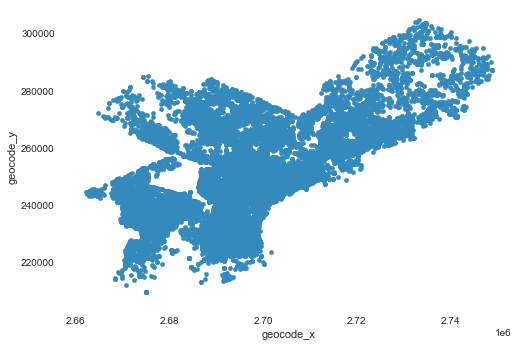

In [64]:
df.plot.scatter('geocode_x','geocode_y')

In [65]:
try:
    os.mkdir('images')
except:
    print('directory already exists')

directory already exists


In [66]:
df['newDecision'].unique()

array(['other', 'approved', 'denied'], dtype=object)

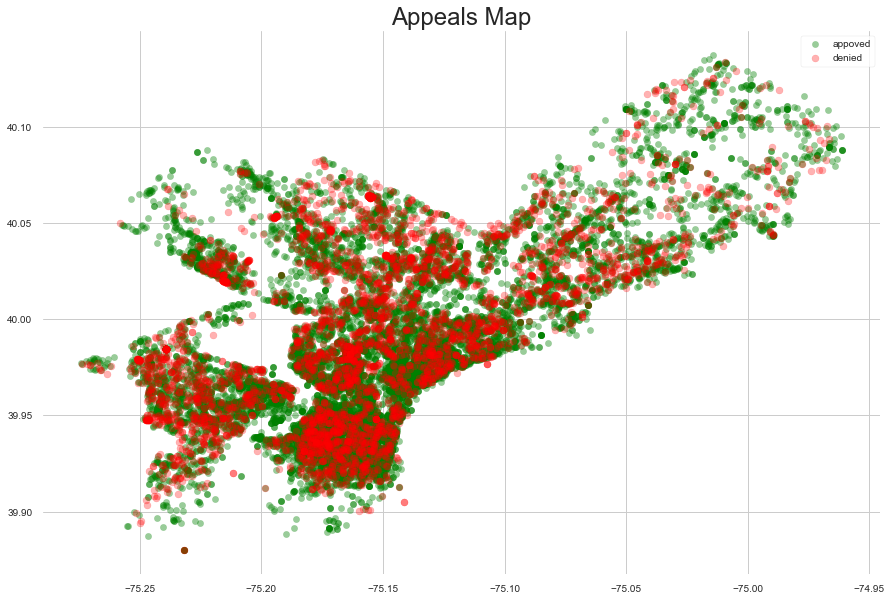

<Figure size 576x396 with 0 Axes>

In [91]:
plt.axes
plt.figure(figsize=(15,10))
plt.title('Appeals Map', size=24)
plt.rc('font', size=24)

dfscat = df[df['newDecision'] == 'approved']
plt.scatter(dfscat['lng'], dfscat['lat'], marker = 'o', label = 'appoved', s=40, alpha=0.4, c='green')

dfscat = df[df['newDecision'] == 'denied']
plt.scatter(dfscat['lng'], dfscat['lat'], marker = 'o', label = 'denied', s=50, alpha=0.3, c='red')


plt.grid('on')
plt.legend()
plt.rc('font', size=18)
plt.show()

    
plt.savefig('images/appeal_map.png',bbox_inches='tight')


In [ ]:
#Distance from CC
df['fromCC'].hist()

In [ ]:
#Longtitude from CC
df['lngfromCC'].hist()

In [ ]:
#Latitude from CC
df['latfromCC'].hist()

### myMetrics Function for model testing

In [ ]:
# Create metrics function to check metrics for different models

def myMetrics(model=None, features=None, X_test=None, y_true_test=None, X_train=None, y_true_train=None):
    
    hypertablerow={}
    hypertablerow['model']=model.__class__.__name__
    hypertablerow['features']=features

    X_train_temp = X_train[features]
    X_test_temp = X_test[features]  
    print(X_train_temp.columns)
    model.fit(X_train_temp,y_train)
    
    y_pred_test = model.predict(X_test_temp)
    y_pred_train = model.predict(X_train_temp)


    # Accuracy
    hypertablerow['accuracy_test'] = metrics.accuracy_score(y_true=y_true_test, y_pred=y_pred_test)
    print('accuracy_test', hypertablerow['accuracy_test'])
    hypertablerow['accuracy_train'] = metrics.accuracy_score(y_true=y_true_train, y_pred=y_pred_train)
    print('accuracy_train', hypertablerow['accuracy_train'])
    # Precision
    hypertablerow['precision_test'] = metrics.precision_score(y_true=y_true_test, y_pred=y_pred_test, average = 'weighted')
    #print('precision_test', hypertablerow['precision_test'])
    hypertablerow['precision_train'] = metrics.precision_score(y_true=y_true_train, y_pred=y_pred_train, average = 'weighted')
    #print('precision_train', hypertablerow['precision_train'])
    # Recall
    hypertablerow['recall_test'] = metrics.recall_score(y_true=y_true_test, y_pred=y_pred_test, average = 'weighted')
    #print('recall_test', hypertablerow['recall_test'])
    hypertablerow['recall_train'] = metrics.recall_score(y_true=y_true_train, y_pred=y_pred_train, average = 'weighted')
    #print('recall_train', hypertablerow['recall_train'])

    hypertable.append(hypertablerow)
    pd.Series(hypertablerow)
    return hypertablerow

In [ ]:
# Create "dummy" variables for systemofrecord columns
df = pd.concat([df, pd.get_dummies(df['systemofrecord'])], axis=1)
df.columns

In [ ]:
# Declare an explanatory variable, and assign some data to it 
#X = df[['ECLIPSE', 'HANSEN']]
X = df.drop(['newDecision'], axis=1)

# Declare a response variable, the decision column of the df 
y = df['newDecision'] 

In [ ]:
# import the preprocessing package
from sklearn import preprocessing

# Call the train_test_split() function
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
from sklearn import svm
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE', 'HANSEN']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']
#features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC']

#hypertablerow={}
#hypertablerow['model']=model.__class__.__name__
#hypertablerow['features']=features

X_train_temp = X_train[features]
X_test_temp = X_test[features]  
print(X_train_temp.columns)
model.fit(X_train_temp,y_train)
    
y_pred_test = model.predict(X_test_temp)
y_pred_train = model.predict(X_train_temp)
y_true_test = y_test
y_true_train = y_train

# Accuracy
hypertablerow['accuracy_test'] = metrics.accuracy_score(y_true=y_true_test, y_pred=y_pred_test)
print('accuracy_test', hypertablerow['accuracy_test'])
hypertablerow['accuracy_train'] = metrics.accuracy_score(y_true=y_true_train, y_pred=y_pred_train)
print('accuracy_train', hypertablerow['accuracy_train'])
"""
# Precision
hypertablerow['precision_test'] = metrics.precision_score(y_true_test, y_pred_test, average = 'weighted')
#print('precision_test', hypertablerow['precision_test'])
hypertablerow['precision_train'] = metrics.precision_score(y_true_train, y_pred_train, average = 'weighted')
#print('precision_train', hypertablerow['precision_train'])
# Recall
hypertablerow['recall_test'] = metrics.recall_score(y_true_test, y_pred_test, average = 'weighted')
#print('recall_test', hypertablerow['recall_test'])
hypertablerow['recall_train'] = metrics.recall_score(y_true_train, y_pred_train, average = 'weighted')
#print('recall_train', hypertablerow['recall_train'])

hypertable.append(hypertablerow)
    
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)
"""

In [ ]:
model = svm.SVC(kernel='linear') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.SVC(kernel='poly') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.SVC(kernel='sigmoid') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
model = svm.SVC(kernel='rbf') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

...

In [ ]:
pd.DataFrame(hypertable).to_csv('hypertable.csv')
dfhypertable=pd.DataFrame(hypertable).sort_values('accuracy_test')
pd.set_option('display.max_colwidth', -1)
dfhypertable.sort_values('accuracy_test',  ascending=False)